In [8]:
import os, re
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

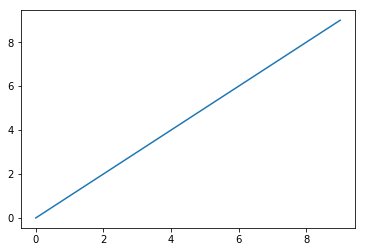

In [3]:
plt.figure()
plt.plot(range(10))

In [70]:
d = r'DATASETS\JETRAILS'
train_df = pd.read_csv(os.path.join(d, 'Train_SU63ISt.csv'))
test_df = pd.read_csv(os.path.join(d, 'Test_0qrQsBZ.csv'))
for df in (train_df, test_df):
    df['Datetime'] = pd.to_datetime(df.Datetime, format='%d-%m-%Y %H:%M')
    df['Year'] = df.Datetime.dt.year
    df['Month'] = df.Datetime.dt.month
    df['Day'] = df.Datetime.dt.day
    df['Hour'] = df.Datetime.dt.hour
    df['Minute'] = df.Datetime.dt.minute
    df['Weekday'] = df.Datetime.dt.weekday
    df['Weekend'] = (df.Weekday == 5)|(df.Weekday == 6)
    df.set_index('Datetime', inplace=True)
    df.drop('ID', axis=1, inplace=True)

In [72]:
train_df[:5]

,Count,Year,Month,Day,Hour,Minute,Weekday,Weekend
Datetime,,,,,,,,
2012-08-25 00:00:00,8,2012,8,25,0,0,5,True
2012-08-25 01:00:00,2,2012,8,25,1,0,5,True
2012-08-25 02:00:00,6,2012,8,25,2,0,5,True
2012-08-25 03:00:00,2,2012,8,25,3,0,5,True
2012-08-25 04:00:00,2,2012,8,25,4,0,5,True


In [69]:
train_df.

,Count,Year,Month,Day,Hour,Minute,Weekday,Weekend
Datetime,,,,,,,,
2012-08-25 00:00:00,8,2012,8,25,0,0,5,True
2012-08-25 01:00:00,2,2012,8,25,1,0,5,True
2012-08-25 02:00:00,6,2012,8,25,2,0,5,True
2012-08-25 03:00:00,2,2012,8,25,3,0,5,True
2012-08-25 04:00:00,2,2012,8,25,4,0,5,True
2012-08-25 05:00:00,2,2012,8,25,5,0,5,True
2012-08-25 06:00:00,2,2012,8,25,6,0,5,True
2012-08-25 07:00:00,2,2012,8,25,7,0,5,True
2012-08-25 08:00:00,6,2012,8,25,8,0,5,True


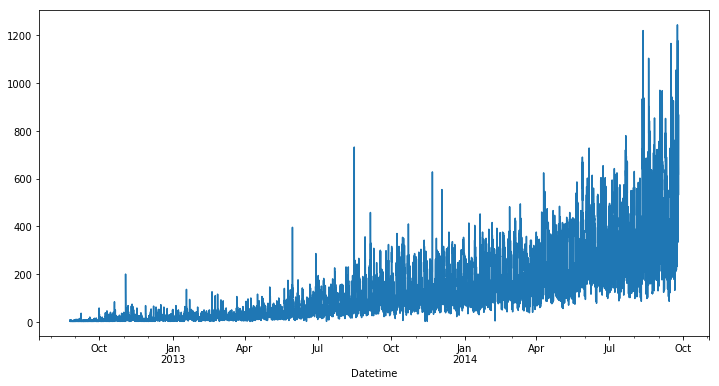

In [44]:
fig, ax = plt.subplots(figsize=(12,6))
train_df.Count.plot(ax=ax)

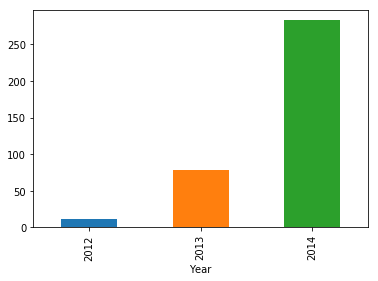

In [54]:
train_df.groupby('Year')['Count'].mean().plot(kind='bar')

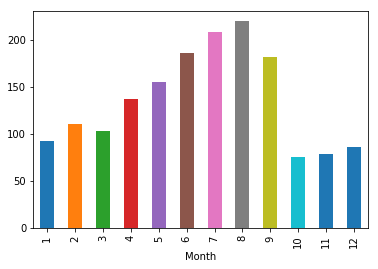

In [73]:
train_df.groupby('Month')['Count'].mean().plot(kind='bar')

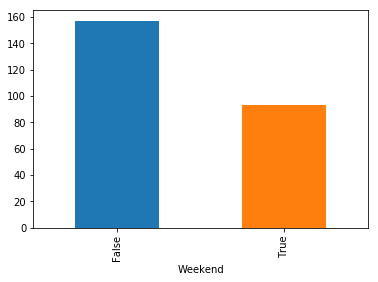

In [74]:
train_df.groupby('Weekend')['Count'].mean().plot(kind='bar')

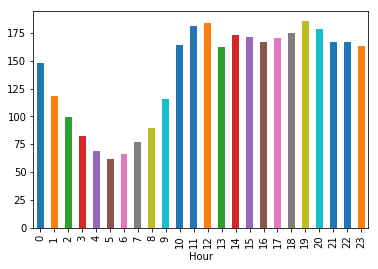

In [75]:
train_df.groupby('Hour')['Count'].mean().plot(kind='bar')

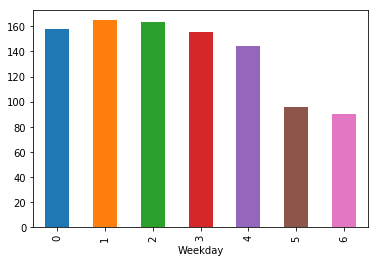

In [76]:
train_df.groupby('Weekday')['Count'].mean().plot(kind='bar')

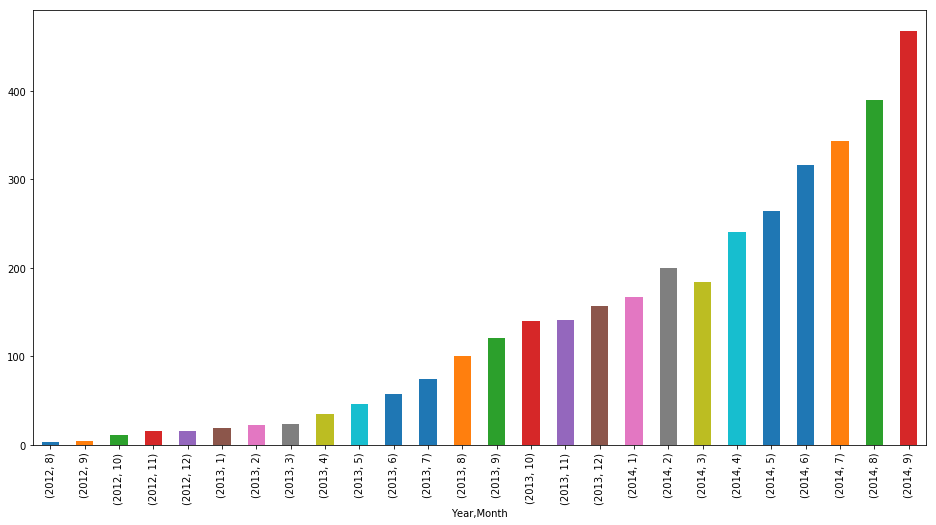

In [88]:
fig, ax = plt.subplots(figsize=(16,8))
t = train_df.groupby(['Year', 'Month'])['Count'].mean()
t.plot(kind='bar')

In [86]:
t

Year  Month
2012  8          2.952381
      9          4.444444
      10        10.986559
      11        15.827778
      12        15.680108
2013  1         18.430108
      2         22.190476
      3         23.588710
      4         34.405556
      5         45.612903
      6         57.333333
      7         74.787634
      8        100.137097
      9        120.744444
      10       139.932796
      11       141.000000
      12       157.387097
2014  1        167.204301
      2        200.202381
      3        183.994624
      4        240.955556
      5        264.497312
      6        316.113889
      7        343.354839
      8        389.981183
      9        468.433333
Name: Count, dtype: float64